# Importing Modules and loading data files. 
strange.csv: Datawith the objects that shows strange behaviour

secondary matches.csv: Secondary objects based on brightness

cone.csv : information from GAIA database retrived for object

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import functions as fxn
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky

file_name = "/home/alok/Documents/GAIAproject/DR3/strange.csv"
strange_obj = pd.read_csv(file_name)
strange_obj['G_K'] = strange_obj['GAIAG'] - strange_obj['TMASSK']

cone = pd.read_csv('/home/alok/Documents/GAIAproject/DR3/cone.csv')
cone["ABSmag"] = cone['GAIAG'] + (5*np.log10(cone['PARALLAX']/100.))
cone["GAIA_GR"] = cone['GAIAG'] - cone['GAIARP']
cone['G_K'] = cone['GAIAG'] - cone['TMASSK']

secondary = pd.read_csv("/home/alok/Documents/GAIAproject/DR3/secondary_matches.csv")
df_secondary = secondary.copy()
df_secondary = df_secondary.drop(columns= "Unnamed: 0")
df_secondary['ABSmag'] = df_secondary['GAIAG'] + (5*np.log10(df_secondary['PARALLAX']/100.))
df_secondary['GAIA_GR'] = df_secondary['GAIAG'] - df_secondary['GAIARP']
df_secondary['G_K'] = df_secondary['GAIAG'] - df_secondary['TMASSK']


gaia = pd.read_csv("/home/alok/isochrones.csv")
gaia = gaia.drop(['Unnamed: 0'], axis=1)
tmass = pd.read_csv("/home/alok/tmass.csv")
tmass = tmass.drop(['Unnamed: 0'], axis=1)
print(len(gaia))
print(len(tmass))

809
793


/home/alok/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


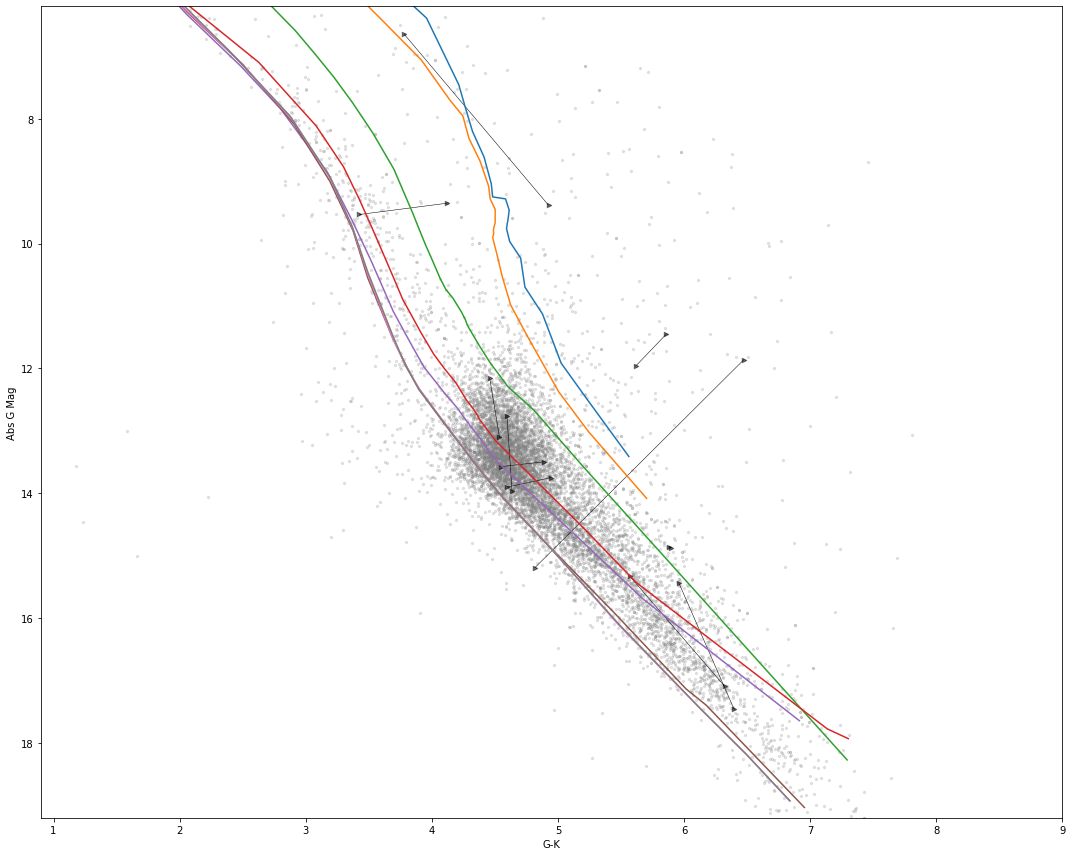

In [2]:
gaia = gaia[["M/Ms",'G', 'G_RP','t(Gyrs)']]
tmass = tmass[["M/Ms",'Mj','Mk','Mh','t(Gyrs)']]

ages = [0.0005, 0.001, 0.01,0.05,0.1, 1.0, 5.0, 10.0]

fig,ax = plt.subplots(1,1,figsize=(15,12))

ax.scatter(cone['G_K'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5, label= 'All Object')

for i in range(len(strange_obj)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(strange_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(strange_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_R.append(strange_obj.iloc[i]['G_K'])
            G_R.append(df_secondary.iloc[j]['G_K'])
    ax.plot(G_R, absG, color = 'black',linestyle = '-', linewidth = 0.5)
    ax.scatter(G_R,absG, marker = '>',color= 'black', alpha = 0.5, s = 20, label = 'Strange Object')

 

#for i in range(len(strange_obj)):
#    name = f"{strange_obj.SHORTNAME.to_list()[i]}"
#    ax.annotate(name, 
#                (strange_obj.GAIA_GR.to_list()[i]+0.01, 
#                strange_obj.ABSmag.to_list()[i]-0.1))





for age in ages:
    gaia_age = gaia[gaia['t(Gyrs)'] == age]
    gaia_age = gaia_age.drop(['t(Gyrs)'], axis = 1)
    tmass_age = tmass[tmass['t(Gyrs)'] == age]
    tmass_age = tmass_age.drop(['t(Gyrs)'], axis = 1)
    data = gaia_age.join(tmass_age.set_index("M/Ms"), on= 'M/Ms')
    data = data.dropna()
    data['G_K'] = data['G']- data['Mk'] 
    ax.plot(data['G_K'], data['G'])
    

ax.set_xlabel("G-K")
ax.set_ylabel("Abs G Mag")
ax.set_xlim(0.90, 9)
ax.set_ylim(6.2,19.2 )
ax.invert_yaxis()   
handles, labels = ax.get_legend_handles_labels()
plt.savefig("age.png")
plt.tight_layout()
plt.show()

In [3]:
new_objects = pd.read_csv('new_objects.csv')
print(len(new_objects))
new_objects = new_objects[new_objects['TMASSK'] > 0]

print(len(new_objects))
new_objects['G_K'] = new_objects['GAIAG']- new_objects['TMASSK']

161
155


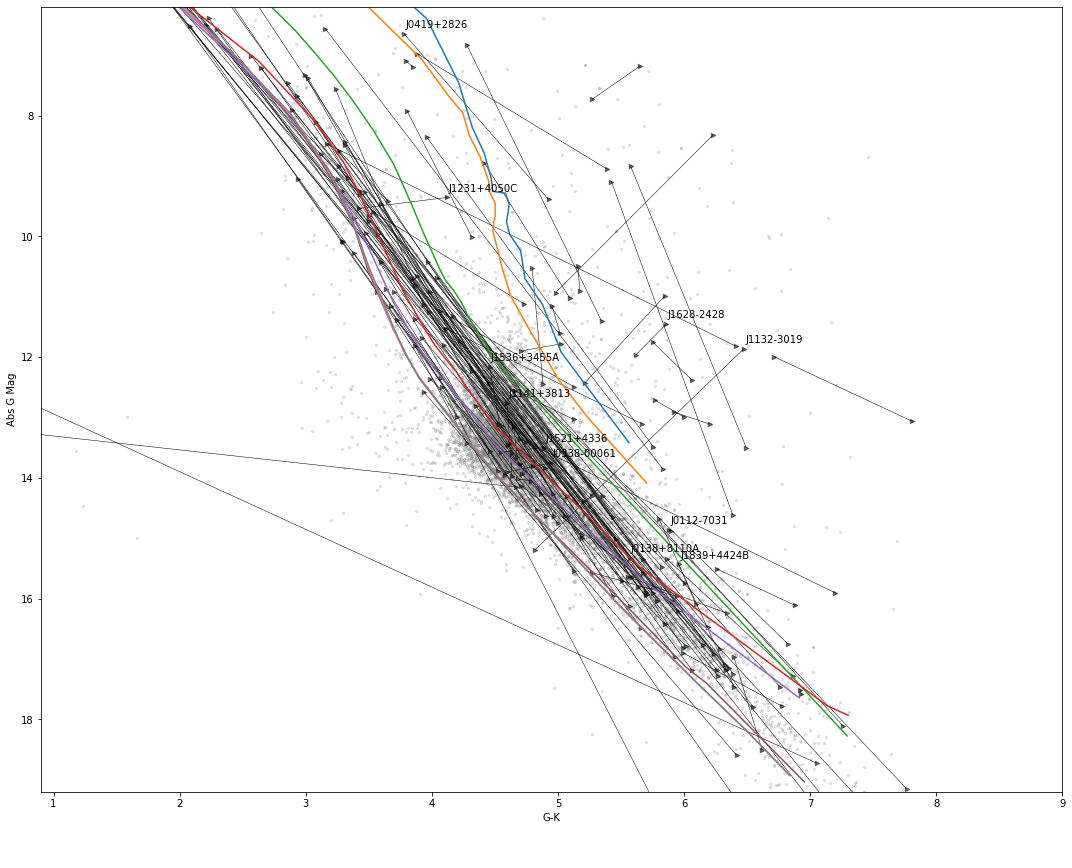

In [4]:
fig,ax = plt.subplots(1,1,figsize=(15,12))

df_secondary = df_secondary[df_secondary['TMASSK']>0]
cone = cone[cone['TMASSK']>0]
ax.scatter(cone['G_K'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5, label= 'All Object')

for i in range(len(new_objects)):
    absG =[]
    G_K = []
    sec_obj = fxn.Converttolist(new_objects.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(new_objects.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_K.append(new_objects.iloc[i]['G_K'])
            G_K.append(df_secondary.iloc[j]['G_K'])
    ax.plot(G_K, absG, color = 'black',linestyle = '-', linewidth = 0.5)
    ax.scatter(G_K,absG, marker = '>',color= 'black', alpha = 0.5, s = 20, label = 'Strange Object')

 

for i in range(len(strange_obj)):
    name = f"{strange_obj.SHORTNAME.to_list()[i]}"
    ax.annotate(name, 
                (strange_obj.G_K.to_list()[i]+0.01, 
                strange_obj.ABSmag.to_list()[i]-0.1))





for age in ages:
    gaia_age = gaia[gaia['t(Gyrs)'] == age]
    gaia_age = gaia_age.drop(['t(Gyrs)'], axis = 1)
    tmass_age = tmass[tmass['t(Gyrs)'] == age]
    tmass_age = tmass_age.drop(['t(Gyrs)'], axis = 1)
    data = gaia_age.join(tmass_age.set_index("M/Ms"), on= 'M/Ms')
    data = data.dropna()
    data['G_K'] = data['G']- data['Mk'] 
    ax.plot(data['G_K'], data['G'])
    

ax.set_xlabel("G-K")
ax.set_ylabel("Abs G Mag")
ax.set_xlim(0.90, 9)
ax.set_ylim(6.2,19.2 )
ax.invert_yaxis()   
handles, labels = ax.get_legend_handles_labels()

plt.tight_layout()
plt.savefig("test.svg")
plt.show()

## Claculating Binding energy and separation and store in the dataframe

In [5]:
p =[]
s= []
alpha = []
delta = []
separation = []


master = pd.read_csv('Master_withDR3.csv')

for i in range(len(new_objects)):
    c1 = SkyCoord(ra = new_objects.iloc[i]['RA']*u.deg, 
                dec = new_objects.iloc[i]['DEC']*u.deg, 
                distance = (100./new_objects.iloc[i]['PARALLAX'])*u.pc)
    sec = fxn.Converttolist(new_objects.iloc[i]['COMPANIONS'])
    
    for j in range(len(master)):
        if master.iloc[j]['SHORTNAME'].strip() in sec :
            
            c2 = SkyCoord(ra = master.iloc[j]['RA']*u.deg, 
                        dec = master.iloc[j]['DEC']*u.deg, 
                        distance = (100./master.iloc[j]['PARALLAX'])*u.pc)
            dist = c1.separation_3d(c2)
            separation.append(dist.au)
            p.append(new_objects.iloc[i]['SHORTNAME'])
            s.append(master.iloc[j]['SHORTNAME'])
            alpha.append(master.iloc[j]['RA'])
            delta.append(master.iloc[j]['DEC'])

sep = {'SHORTNAME': p, 'Obj_B': s,'RA_B':alpha, 'DEC_B':delta, 'separation':separation}
df_sep = pd.DataFrame(sep)

In [6]:
new_obj = pd.merge(new_objects, df_sep)

G= 6.6743e-11
M_sun = 1.988409870698051e+30
new_obj['Binding energy'] = np.array(
                                    list(map( lambda r: G*(0.5*M_sun)**2/(r*1.496e+11), 
                                        new_obj['separation'])))


In [7]:
print("The number objects that satisfy binding energy limit : ",len(new_obj[new_obj['Binding energy'] > 2.5e+33]))
print("The number objects that do not satisfy binding energy limit : ",len(new_obj) - len(new_obj[new_obj['Binding energy'] > 2.5e+33]))


The number objects that satisfy binding energy limit :  120
The number objects that do not satisfy binding energy limit :  21


# Find binary system with same age

In [8]:
second = []
for i in range(len(new_objects)):
    sec_obj = fxn.Converttolist(new_objects.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            second.append(df_secondary.iloc[j][:])

In [10]:
only_secondary = pd.DataFrame(second, columns= df_secondary.columns)

In [9]:
gaia = gaia[gaia['t(Gyrs)'] < 0.08]
tmass = tmass[tmass['t(Gyrs)']< 0.08]
time = list(set(gaia['t(Gyrs)']))
print(time)

[0.015, 0.03, 0.05, 0.01, 0.008, 0.025, 0.04, 0.005, 0.02, 0.004, 0.003, 0.002, 0.001, 0.0005]


## finding out the pair of Primary and secondary that are isochrones. 

The age of the objects that are isochrones are consideres to be greater tham 0.08 and the isochrones lines gets too closer to r=each other and hence difficult to differentiate between the different age isochrones. 



In [56]:
pri=[]
sec =[]

for t in time:
    gaia_age = gaia[gaia['t(Gyrs)'] == t]
    gaia_age = gaia_age.drop(['t(Gyrs)'], axis = 1)
    tmass_age = tmass[tmass['t(Gyrs)'] == t]
    tmass_age = tmass_age.drop(['t(Gyrs)'], axis = 1)
    data = gaia_age.join(tmass_age.set_index("M/Ms"), on= 'M/Ms')
    data = data.dropna()
    data['G_K'] = data['G']- data['Mk']

    object_A = []
    object_B= []
    for i in range(len(data)):
        g = data.iloc[i]['G']
        gk = data.iloc[i]['G_K']
        filter = new_objects['ABSmag'] > g-0.05
        filter &= new_objects['ABSmag'] < g+0.05
        filter &= new_objects['G_K'] > gk-0.5
        filter &= new_objects['G_K'] < gk+ 0.5
        filtered_obj = new_objects[filter]
        if len(filtered_obj) == 0:
            continue
        else:
            object_A.append(filtered_obj[:][:])

    for i in range(len(data)):
        g = data.iloc[i]['G']
        gk = data.iloc[i]['G_K']
        filter = only_secondary['ABSmag'] > g-0.05
        filter &= only_secondary['ABSmag'] < g+0.05
        filter &= only_secondary['G_K'] > gk-0.5
        filter &= only_secondary['G_K'] < gk+ 0.5
        filtered_obj = only_secondary[filter]
        if len(filtered_obj) == 0:
            continue
        else:
            object_B.append(filtered_obj[:][:])
    if len(object_A)>0 and len(object_B)>0:
        obj_A = [object_A[i].values[0] for i in range(len(object_A))]
        object_A = pd.DataFrame(obj_A, columns=list(new_objects.columns))
        obj_B = [object_B[i].values[0] for i in range(len(object_B))]
        object_B = pd.DataFrame(obj_B, columns=list(only_secondary.columns))
    else:
        continue

    for i in range(len(object_A)):
        sec_obj = fxn.Converttolist(object_A.iloc[i]['COMPANIONS'])
        for j in range(len(object_B)):
            if object_B.iloc[j]['SHORTNAME'].strip() in sec_obj:
                sec.append(object_B.iloc[j][:])
                pri.append(object_A.iloc[i][:])    

In [57]:
pri = [pri[i].values for i in range(len(pri))]
sec = [sec[i].values for i in range(len(sec))]
pri = pd.DataFrame(pri, columns= list(object_A.columns))
sec = pd.DataFrame(sec, columns= list(object_B.columns))


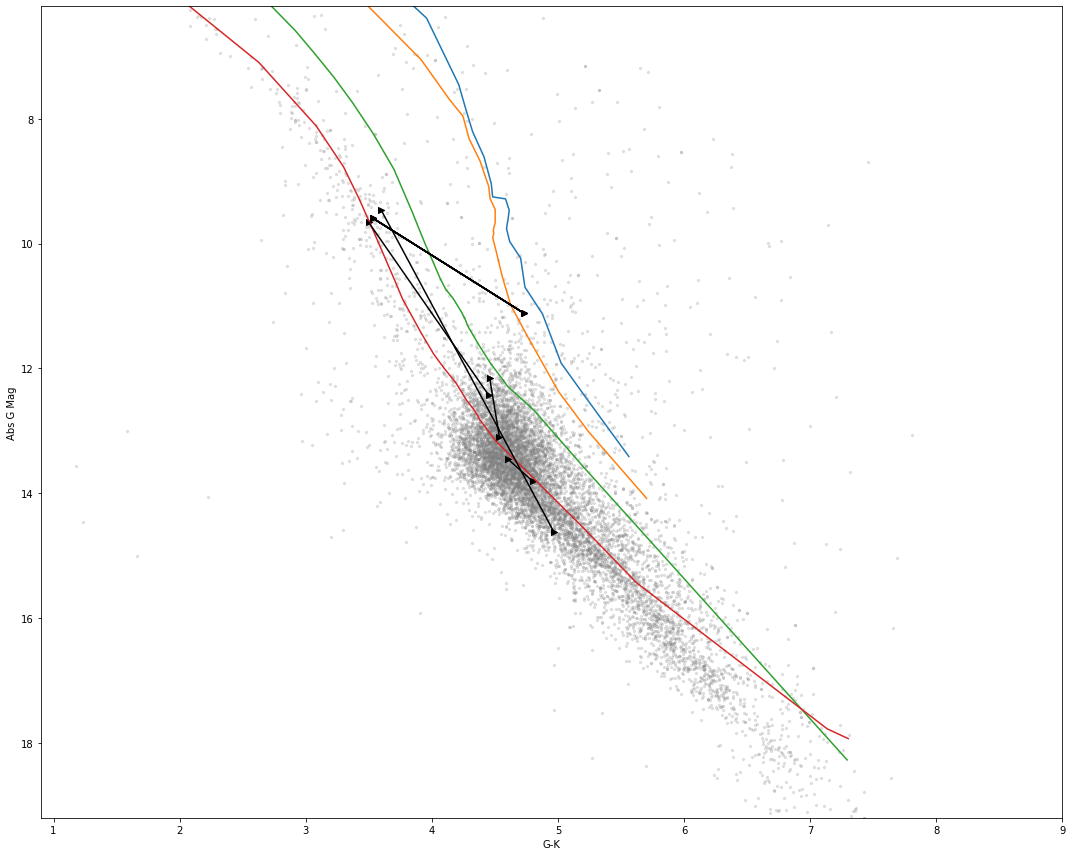

In [58]:
fig,ax = plt.subplots(1,1,figsize=(15,12))



cone = cone[cone['TMASSK']>0]
ax.scatter(cone['G_K'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5, label= 'All Object')


for age in ages:
    gaia_age = gaia[gaia['t(Gyrs)'] == age]
    gaia_age = gaia_age.drop(['t(Gyrs)'], axis = 1)
    tmass_age = tmass[tmass['t(Gyrs)'] == age]
    tmass_age = tmass_age.drop(['t(Gyrs)'], axis = 1)
    data = gaia_age.join(tmass_age.set_index("M/Ms"), on= 'M/Ms')
    data = data.dropna()
    data['G_K'] = data['G']- data['Mk'] 
    ax.plot(data['G_K'], data['G'])

for i in range(len(pri)):
    gk =[]
    g= []
    sec_obj = fxn.Converttolist(pri.iloc[i]['COMPANIONS'])
    for j in range(len(sec)):
        if sec.iloc[j]['SHORTNAME'].strip() in sec_obj:
            gk.append(sec.iloc[j]["G_K"])
            gk.append(pri.iloc[j]["G_K"])
            g.append(sec.iloc[j]["ABSmag"])
            g.append(pri.iloc[j]["ABSmag"])
    ax.plot(gk, g, color = 'black', linestyle ='-')
    ax.scatter(gk,g, marker= ">", color ='black')




ax.set_xlabel("G-K")
ax.set_ylabel("Abs G Mag")
ax.set_xlim(0.90, 9)
ax.set_ylim(6.2,19.2 )
ax.invert_yaxis()   
handles, labels = ax.get_legend_handles_labels()

plt.tight_layout()
plt.savefig("binary_iso.png")
plt.show()

# Machine learning approach

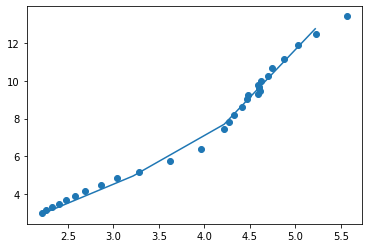

In [54]:
from scipy.optimize import curve_fit

def objective(x,a,b,c,d,e,f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x+f

x, y = data['G_K'], data['G']

popt, _ = curve_fit(objective, x, y)

a, b, c, d,e,f = popt
plt.scatter(x,y)

x_line = np.arange(min(x), max(x))
y_line = objective(x_line, a,b,c,d,e,f)

plt.plot(x_line, y_line)
plt.show()

In [9]:
new_obj = new_obj[new_obj['Binding energy'] > 2.5e+33]

iso_list = []

for age in ages:
    gaia_age = gaia[gaia['t(Gyrs)'] == age]
    gaia_age = gaia_age.drop(['t(Gyrs)'], axis = 1)
    tmass_age = tmass[tmass['t(Gyrs)'] == age]]  
    tmass_age = tmass_age.drop(['t(Gyrs)'], axis = 1)
    data = gaia_age.join(tmass_age.set_index("M/Ms"), on= 'M/Ms')
    data = data.dropna()
    data['G_K'] = data['G']- data['Mk']
    for i in range(len(new_obj)):
        sec_obj = fxn.Converttolist(new_obj.iloc[i]['COMPANIONS'])
        for j in range(len(df_secondary)):
            if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
                

SyntaxError: unexpected EOF while parsing (<ipython-input-9-656fa0a499cf>, line 17)

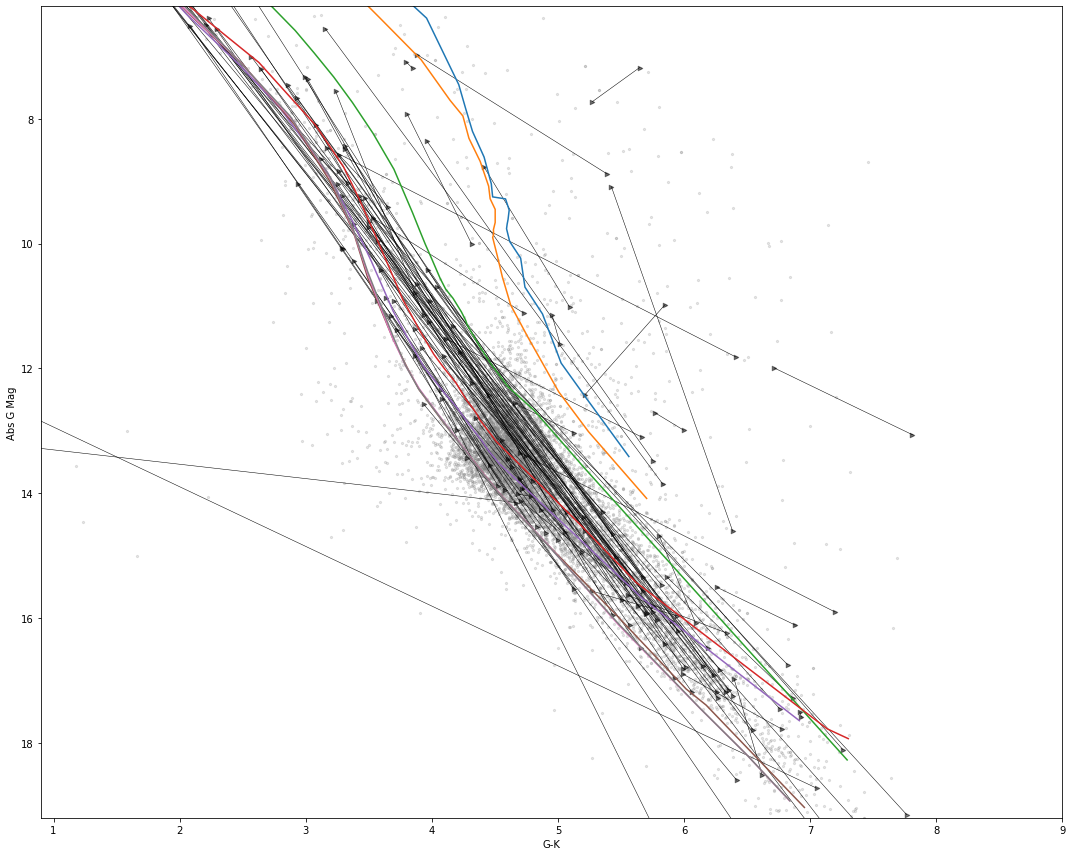

In [44]:
new_obj = new_obj[new_obj['Binding energy'] > 2.5e+33]
new_obj = new_obj[new_obj['Strange'] != 1]

fig,ax = plt.subplots(1,1,figsize=(15,12))

df_secondary = df_secondary[df_secondary['TMASSK']>0]
cone = cone[cone['TMASSK']>0]
ax.scatter(cone['G_K'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5, label= 'All Object')

for i in range(len(new_obj)):
    absG =[]
    G_K = []
    sec_obj = fxn.Converttolist(new_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(new_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_K.append(new_obj.iloc[i]['G_K'])
            G_K.append(df_secondary.iloc[j]['G_K'])
    ax.plot(G_K, absG, color = 'black',linestyle = '-', linewidth = 0.5)
    ax.scatter(G_K,absG, marker = '>',color= 'black', alpha = 0.5, s = 20, label = 'Strange Object')

 
for age in ages:
    gaia_age = gaia[gaia['t(Gyrs)'] == age]
    gaia_age = gaia_age.drop(['t(Gyrs)'], axis = 1)
    tmass_age = tmass[tmass['t(Gyrs)'] == age]
    tmass_age = tmass_age.drop(['t(Gyrs)'], axis = 1)
    data = gaia_age.join(tmass_age.set_index("M/Ms"), on= 'M/Ms')
    data = data.dropna()
    data['G_K'] = data['G']- data['Mk'] 
    ax.plot(data['G_K'], data['G'])

masses = [0.01,0.05,0.1,0.5]

for mass in masses:
    gaia_age = gaia[gaia['M/Ms'] == mass]
    gaia_age = gaia_age.drop(['M/Ms'], axis = 1)
    tmass_age = tmass[tmass['M/Ms'] == age]
    tmass_age = tmass_age.drop(['M/Ms'], axis = 1)
    data = gaia_age.join(tmass_age.set_index("t(Gyrs)"), on= 't(Gyrs)')
    data = data.dropna()
    data['G_K'] = data['G']- data['Mk'] 
    ax.plot(data['G_K'], data['G'])

    

ax.set_xlabel("G-K")
ax.set_ylabel("Abs G Mag")
ax.set_xlim(0.90, 9)
ax.set_ylim(6.2,19.2 )
ax.invert_yaxis()   
handles, labels = ax.get_legend_handles_labels()

plt.tight_layout()
plt.savefig("g_k.svg")
plt.show()

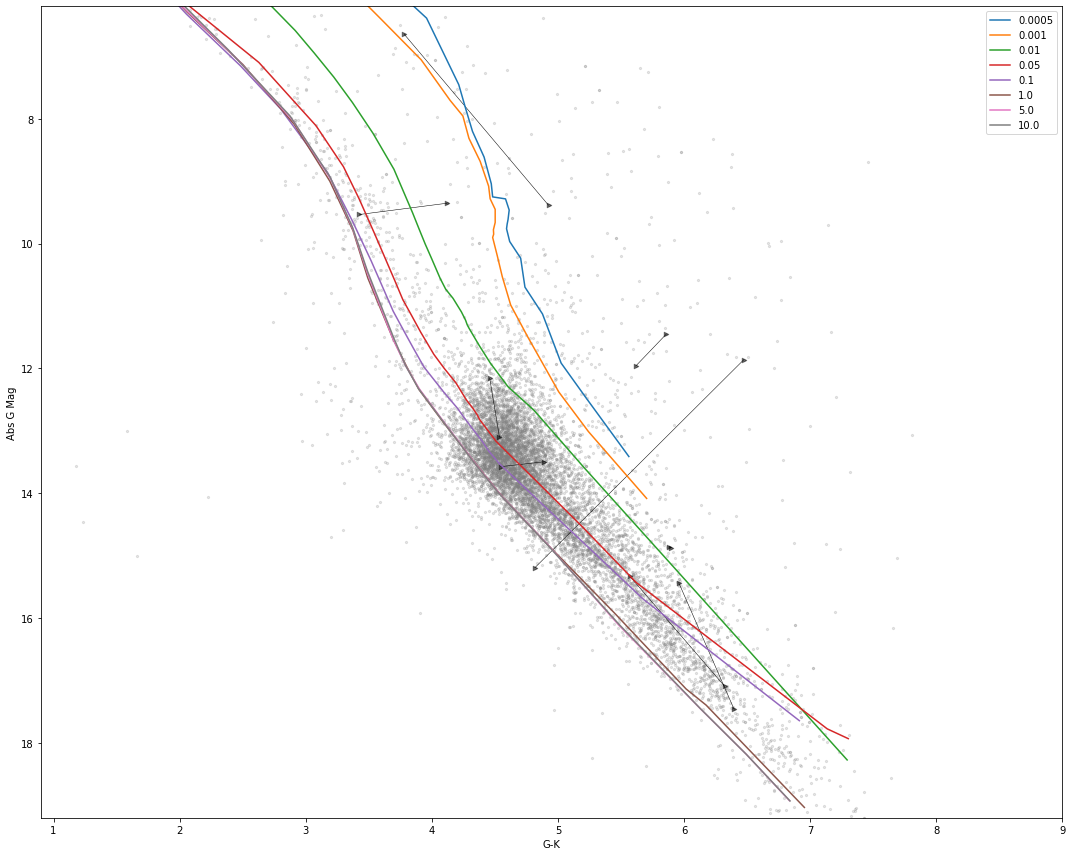

In [40]:
new_obj = new_obj[new_obj['Binding energy'] > 2.5e+33]
strange = new_obj[new_obj['Strange'] == 1]

fig,ax = plt.subplots(1,1,figsize=(15,12))

df_secondary = df_secondary[df_secondary['TMASSK']>0]
cone = cone[cone['TMASSK']>0]
ax.scatter(cone['G_K'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5,)

for i in range(len(new_obj)):
    absG =[]
    G_K = []
    sec_obj = fxn.Converttolist(new_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(new_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_K.append(new_obj.iloc[i]['G_K'])
            G_K.append(df_secondary.iloc[j]['G_K'])
    ax.plot(G_K, absG, color = 'black',linestyle = '-', linewidth = 0.5)
    ax.scatter(G_K,absG, marker = '>',color= 'black', alpha = 0.5, s = 20)
 
for age in ages:
    gaia_age = gaia[gaia['t(Gyrs)'] == age]
    gaia_age = gaia_age.drop(['t(Gyrs)'], axis = 1)
    tmass_age = tmass[tmass['t(Gyrs)'] == age]
    tmass_age = tmass_age.drop(['t(Gyrs)'], axis = 1)
    data = gaia_age.join(tmass_age.set_index("M/Ms"), on= 'M/Ms')
    data = data.dropna()
    data['G_K'] = data['G']- data['Mk'] 
    ax.plot(data['G_K'], data['G'], label = age)


masses = [0.01,0.05,0.1,0.5]

for mass in masses:
    gaia_age = gaia[gaia['M/Ms'] == mass]
    gaia_age = gaia_age.drop(['M/Ms'], axis = 1)
    tmass_age = tmass[tmass['M/Ms'] == age]
    tmass_age = tmass_age.drop(['M/Ms'], axis = 1)
    data = gaia_age.join(tmass_age.set_index("t(Gyrs)"), on= 't(Gyrs)')
    data = data.dropna()
    data['G_K'] = data['G']- data['Mk'] 
    ax.plot(data['G_K'], data['G'])
    

ax.set_xlabel("G-K")
ax.set_ylabel("Abs G Mag")
ax.set_xlim(0.90, 9)
ax.set_ylim(6.2,19.2 )
ax.invert_yaxis()   
handles, labels = ax.get_legend_handles_labels()
plt.legend()
plt.tight_layout()
plt.savefig("test.svg")
plt.show()